In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 提出问题

1. 找出影响单车周期预订的因素；

2. 找出季节，天气（湿度、风速，气温等）或工作日与单车预定数据之间的关系。

# 数据导入 & 探索

In [3]:
# 导入数据
filepath = '/Users/sunstry/Desktop/Resume & Projects/bikes/bikes_data.csv'
bikes = pd.read_csv(filepath)

In [4]:
bikes.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [5]:
bikes.tail()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
17409,2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0
17410,2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0
17411,2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0
17412,2017-01-03 22:00:00,224,5.5,1.5,76.0,23.0,4.0,0.0,0.0,3.0
17413,2017-01-03 23:00:00,139,5.0,1.0,76.0,22.0,2.0,0.0,0.0,3.0


In [6]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  float64
 7   is_holiday    17414 non-null  float64
 8   is_weekend    17414 non-null  float64
 9   season        17414 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB


In [8]:
bikes.describe().T

,count,mean,std,min,25%,50%,75%,max
cnt,17414.0,1143.101642,1085.108068,0.0,257.0,844.0,1671.75,7860.0
t1,17414.0,12.468091,5.571818,-1.5,8.0,12.5,16.00,34.0
t2,17414.0,11.520836,6.615145,-6.0,6.0,12.5,16.00,34.0
hum,17414.0,72.324954,14.313186,20.5,63.0,74.5,83.00,100.0
wind_speed,17414.0,15.913063,7.894570,0.0,10.0,15.0,20.50,56.5
weather_code,17414.0,2.722752,2.341163,1.0,1.0,2.0,3.00,26.0
is_holiday,17414.0,0.022051,0.146854,0.0,0.0,0.0,0.00,1.0
is_weekend,17414.0,0.285403,0.451619,0.0,0.0,0.0,1.00,1.0
season,17414.0,1.492075,1.118911,0.0,0.0,1.0,2.00,3.0


In [9]:
bikes.shape

(17414, 10)

In [11]:
# 添加年、月列
bikes['timestamp'] = pd.to_datetime(bikes['timestamp'])

In [12]:
bikes['year'] = bikes['timestamp'].dt.year

In [13]:
bikes['month'] = bikes['timestamp'].dt.month

In [14]:
bikes.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year,month
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2015,1
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,2015,1
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2015,1
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,2015,1
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,2015,1


In [15]:
# null检查
bikes.isna().sum()

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
year            0
month           0
dtype: int64

In [17]:
# 重复值检查
bikes.duplicated().any()

False

In [19]:
# 季节订单统计
bikes['season'].value_counts(ascending=False)

season
0.0    4394
1.0    4387
3.0    4330
2.0    4303
Name: count, dtype: int64

In [20]:
# 节假日订单统计
bikes['is_holiday'].value_counts()

is_holiday
0.0    17030
1.0      384
Name: count, dtype: int64

In [21]:
# 天气订单统计
bikes['weather_code'].value_counts(ascending=False)

weather_code
1.0     6150
2.0     4034
3.0     3551
7.0     2141
4.0     1464
26.0      60
10.0      14
Name: count, dtype: int64

In [24]:
# 去除天气异常值
bikes = bikes[(bikes['weather_code']!=10) & (bikes['weather_code']!=26)]

In [23]:
bikes

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year,month
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2015,1
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,2015,1
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2015,1
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,2015,1
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,2015,1
...,...,...,...,...,...,...,...,...,...,...,...,...
17409,2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0,2017,1
17410,2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0,2017,1
17411,2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0,2017,1
17412,2017-01-03 22:00:00,224,5.5,1.5,76.0,23.0,4.0,0.0,0.0,3.0,2017,1


In [25]:
# 周末情况订单详情
bikes['is_weekend'].value_counts()

is_weekend
0.0    12399
1.0     4941
Name: count, dtype: int64

In [26]:
# 查看不同天气的订单
bikes.groupby(by='weather_code')['cnt'].mean()

weather_code
1.0    1162.088943
2.0    1496.177491
3.0    1195.124472
4.0     635.230874
7.0     712.966371
Name: cnt, dtype: float64

# 可视化分析

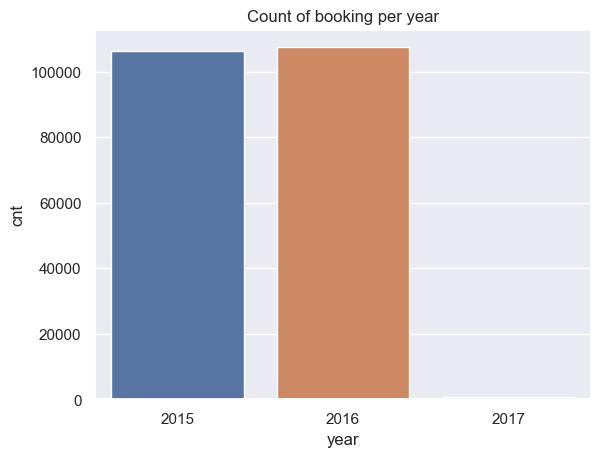

In [72]:
# 各年份订单情况
year_data = bikes.groupby(['year'])['cnt'].sum()
year_data = year_data.reset_index()
sns.barplot(x='year',y='cnt',data=year_data)
plt.title('Count of booking per year')
plt.show()

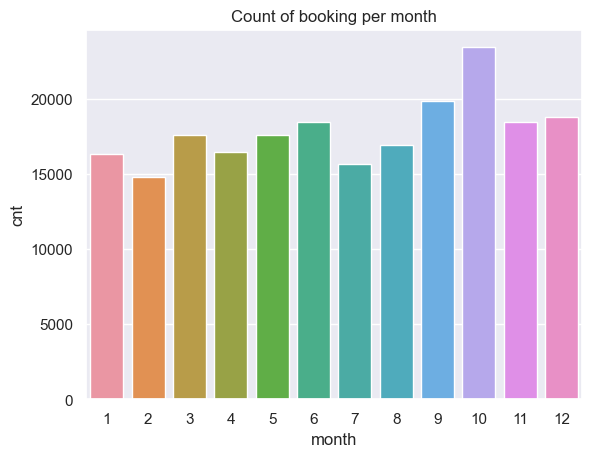

In [73]:
month_data = bikes.groupby(['month'])['cnt'].sum()
month_data = month_data.reset_index()
sns.barplot(x='month',y='cnt',data=month_data)
plt.title('Count of booking per month')
plt.show()

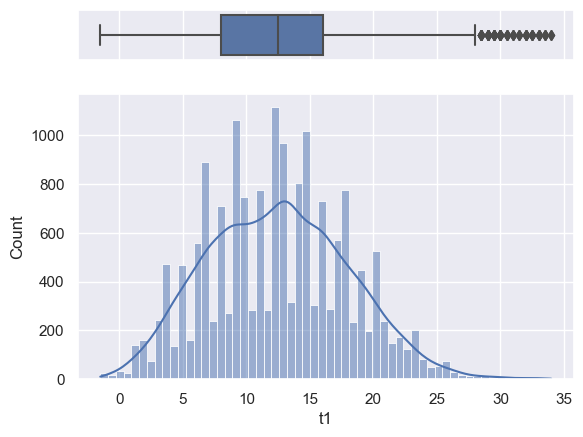

In [27]:
sns.set(style="darkgrid")
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(data=bikes,x='t1', ax=ax_box)
sns.histplot(data=bikes, x="t1", ax=ax_hist,kde=True)
ax_box.set(xlabel='')
plt.show()

In [28]:
# 异常值处理
Q3 = bikes['t1'].quantile(0.75)
Q1 = bikes['t1'].quantile(0.25)
IQR = (Q3-Q1) / 2
upper = Q3+(1.5*IQR)
lower = Q1-(1.5*IQR)
(upper,lower)

(22.0, 2.0)

In [29]:
bikes = bikes[(bikes['t1']>lower) & (bikes['t1']<upper)]

In [31]:
bikes.shape

(16051, 12)

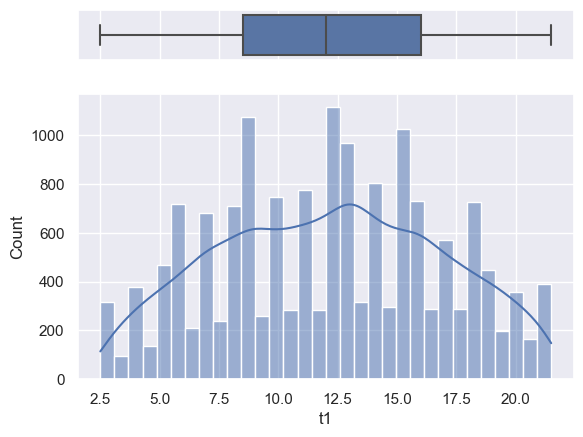

In [32]:
# 异常值处理后查看
sns.set(style="darkgrid")
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(data=bikes,x='t1', ax=ax_box)
sns.histplot(data=bikes, x="t1", ax=ax_hist,kde=True)
ax_box.set(xlabel='')
plt.show()

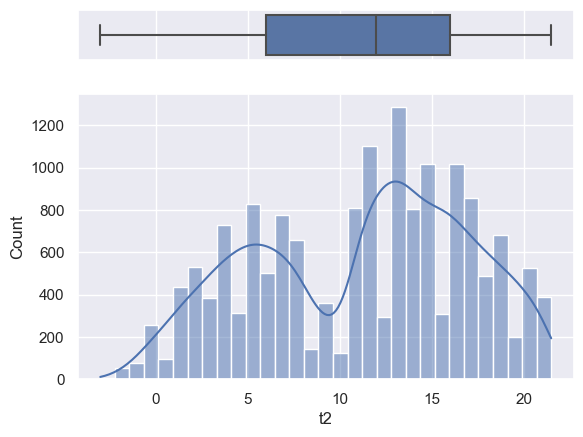

In [33]:
sns.set(style="darkgrid")
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(data=bikes,x='t2', ax=ax_box)
sns.histplot(data=bikes, x="t2", ax=ax_hist,kde=True)
ax_box.set(xlabel='')
plt.show()

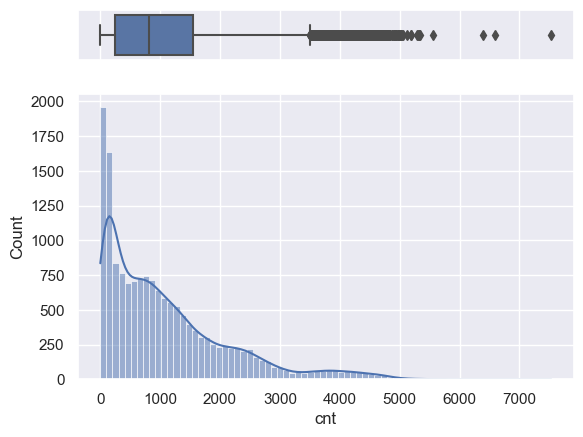

In [34]:
# 查看cnt数据订单情况
sns.set(style="darkgrid")
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(data=bikes,x='cnt', ax=ax_box)
sns.histplot(data=bikes, x="cnt", ax=ax_hist,kde=True)
ax_box.set(xlabel='')
plt.show()

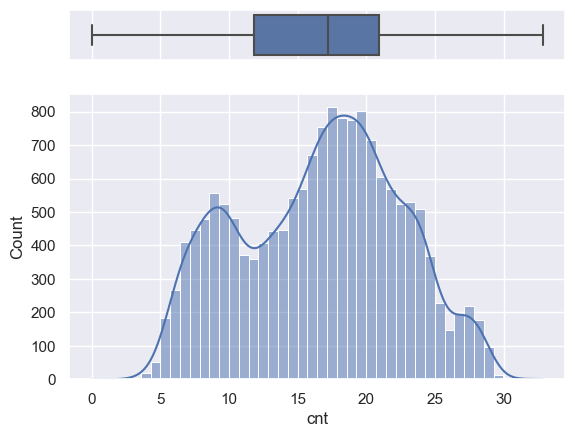

In [39]:
from scipy import stats
from scipy.stats import boxcox,yeojohnson

# 异常值处理
bikes['cnt'] = (yeojohnson(bikes['cnt'])[0])
sns.set(style="darkgrid")
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(data=bikes,x='cnt', ax=ax_box)
sns.histplot(data=bikes, x="cnt", ax=ax_hist,kde=True)
ax_box.set(xlabel='')
plt.show()

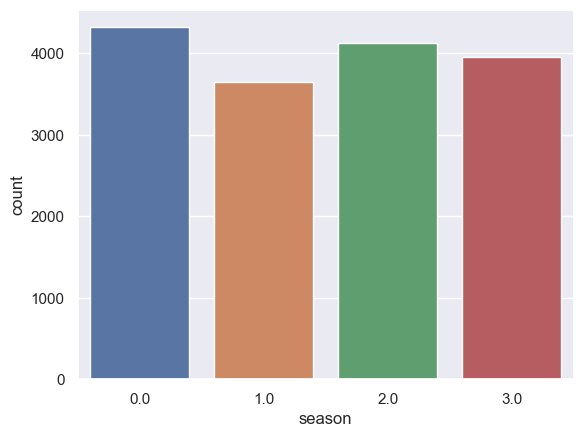

In [41]:
# 各季节订单统计
sns.countplot(data=bikes,x='season')
plt.show()

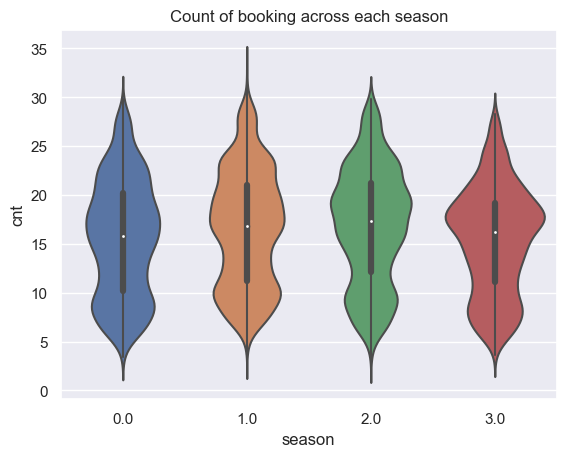

In [62]:
sns.violinplot(y='cnt',x='season',data=bikes)
plt.title('Count of booking across each season')
plt.show()

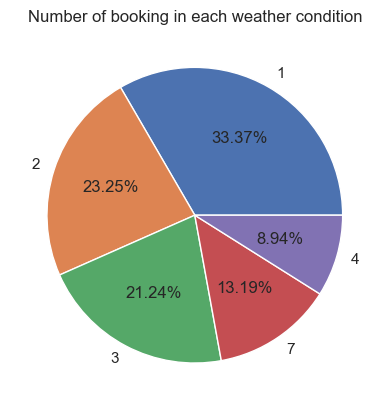

In [45]:
type_value_count = bikes['weather_code'].value_counts(normalize=True)*100
plt.pie(type_value_count,labels=[1,2,3,7,4],autopct='%1.2f%%')
plt.title('Number of booking in each weather condition')
plt.show()

- 大部分订单来自season 1

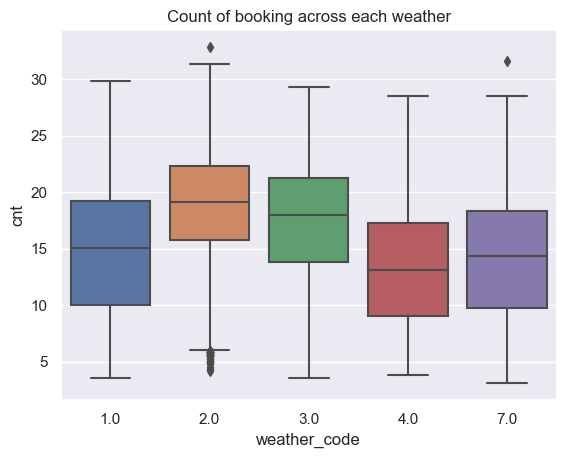

In [63]:
sns.boxplot(y='cnt',x='weather_code',data=bikes)
plt.title('Count of booking across each weather')
plt.show()

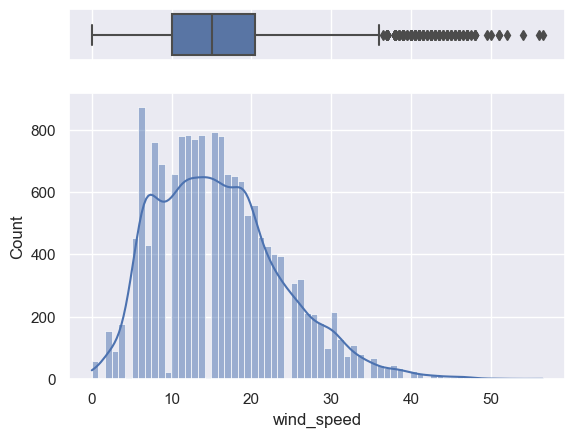

In [47]:
# 风速因素订单
sns.set(style="darkgrid")
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(data=bikes,x='wind_speed', ax=ax_box)
sns.histplot(data=bikes, x="wind_speed", ax=ax_hist,kde=True)
ax_box.set(xlabel='')
plt.show()

In [48]:
# 异常值处理
Q3 = bikes['wind_speed'].quantile(0.75)
Q1 = bikes['wind_speed'].quantile(0.25)
IQR = (Q3-Q1) / 2
upper = Q3+(1.5*IQR)
lower = Q1-(1.5*IQR)
(upper,lower)

(28.375, 2.125)

In [49]:
bikes = bikes[(bikes['wind_speed']>lower) & (bikes['wind_speed']<upper)]

In [51]:
bikes.shape

(14606, 12)

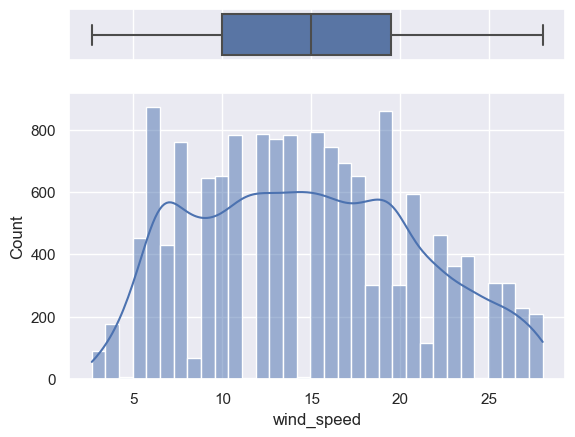

In [52]:
sns.set(style="darkgrid")
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(data=bikes,x='wind_speed', ax=ax_box)
sns.histplot(data=bikes, x="wind_speed", ax=ax_hist,kde=True)
ax_box.set(xlabel='')
plt.show()

- 风速范围在3-28之间

- 风速中值为15

- 25%的风速在10以下

- 75%的风速在20以下

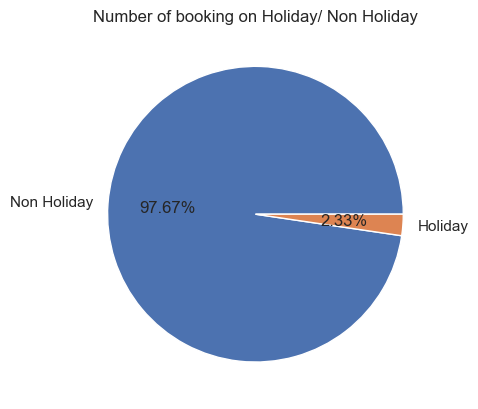

In [54]:
# 周末订单情况
type_value_count = bikes['is_holiday'].value_counts(normalize=True)*100
plt.pie(type_value_count,labels=['Non Holiday','Holiday'],autopct='%1.2f%%')
plt.title('Number of booking on Holiday/ Non Holiday')
plt.show()

- 几乎所有订单来自非节假日

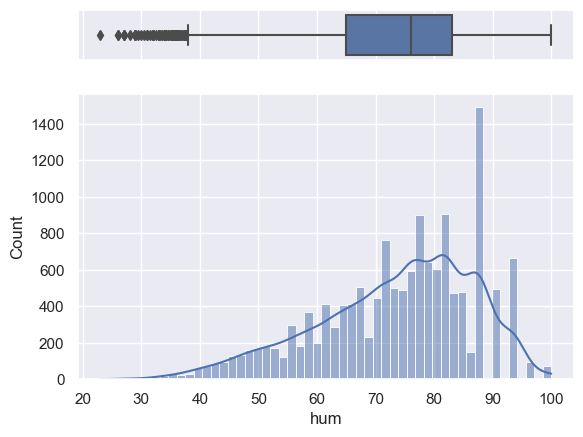

In [56]:
# 探究湿度对订单的影响
sns.set(style="darkgrid")
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(data=bikes,x='hum', ax=ax_box)
sns.histplot(data=bikes, x="hum", ax=ax_hist,kde=True)
ax_box.set(xlabel='')
plt.show()

In [57]:
# 异常值处理
Q3 = bikes['hum'].quantile(0.75)
Q1 = bikes['hum'].quantile(0.25)
IQR = (Q3-Q1) / 2
upper = Q3+(1.5*IQR)
lower = Q1-(1.5*IQR)
(upper,lower)

(96.5, 51.5)

In [58]:
bikes = bikes[(bikes['hum']>lower) & (bikes['hum']<upper)]

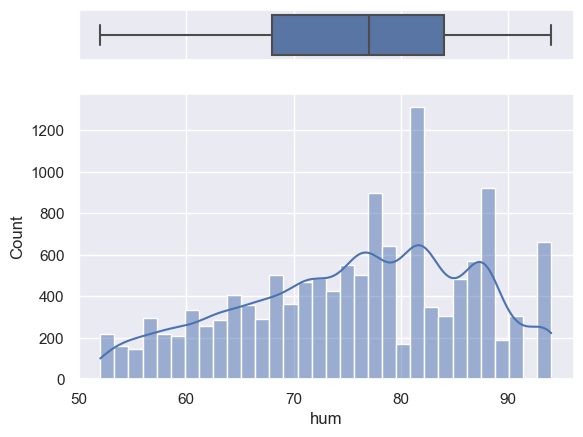

In [59]:
sns.set(style="darkgrid")
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(data=bikes,x='hum', ax=ax_box)
sns.histplot(data=bikes, x="hum", ax=ax_hist,kde=True)
ax_box.set(xlabel='')
plt.show()

- 湿度对订单整体影响不是很大

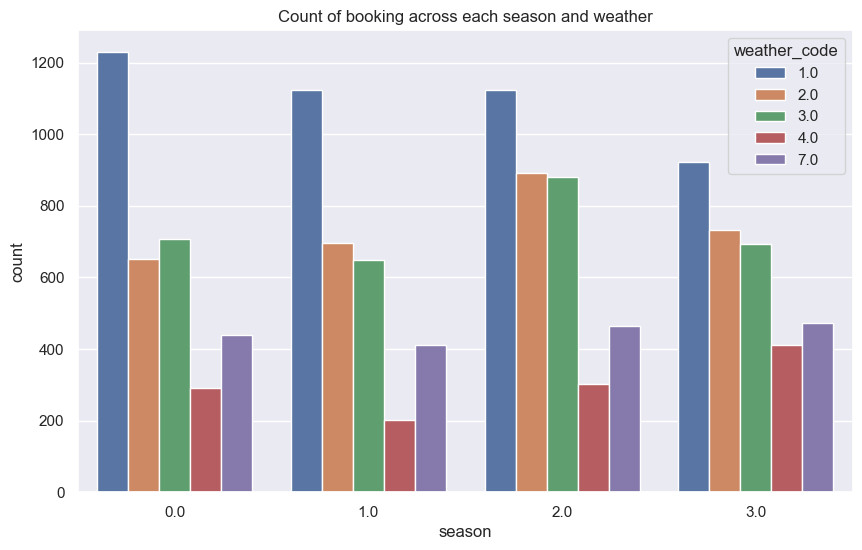

In [64]:
# 各季节天气因素对订单影响
plt.figure(figsize=(10,6))
sns.countplot(x='season',hue='weather_code',data=bikes)
plt.title('Count of booking across each season and weather')
plt.show()

- 天气在各季节对订单影响规律一致，季节0.0, 1.0 订单量高，天气1.0订单高

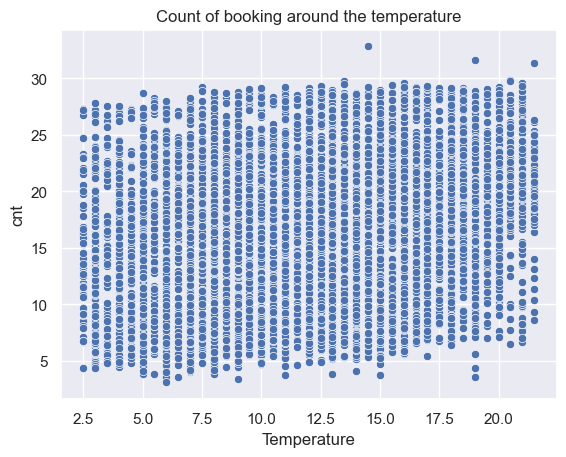

In [65]:
sns.scatterplot(x='t1',y='cnt',data=bikes)
plt.title('Count of booking around the temperature')
plt.xlabel('Temperature')
plt.show()

- 各气温下，订单分布均匀

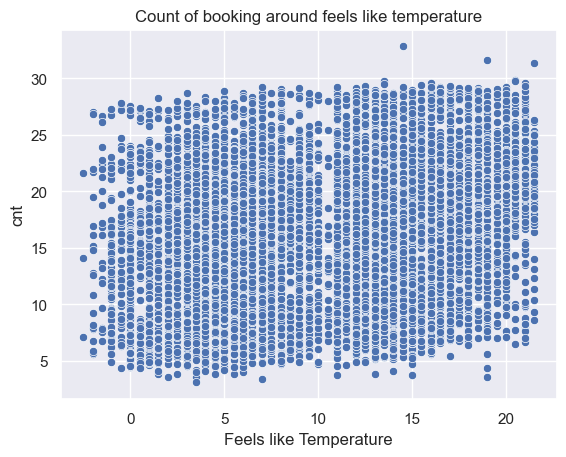

In [67]:
sns.scatterplot(x='t2',y='cnt',data=bikes)
plt.title('Count of booking around feels like temperature')
plt.xlabel('Feels like Temperature')
plt.show()

- 订单在体感温度上也呈现均匀分布

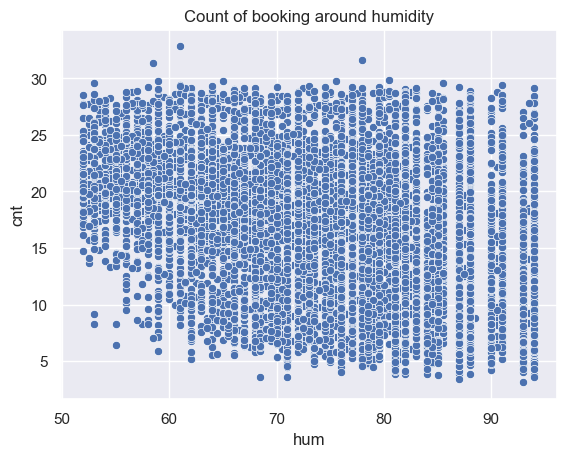

In [69]:
sns.scatterplot(x='hum',y='cnt',data=bikes)
plt.title('Count of booking around humidity')
plt.show()

- 湿度较低时，订单分布比较集中

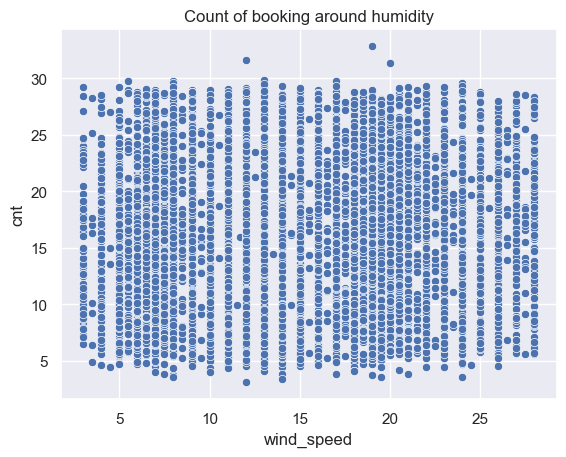

In [70]:
sns.scatterplot(x='wind_speed',y='cnt',data=bikes)
plt.title('Count of booking around humidity')
plt.show()

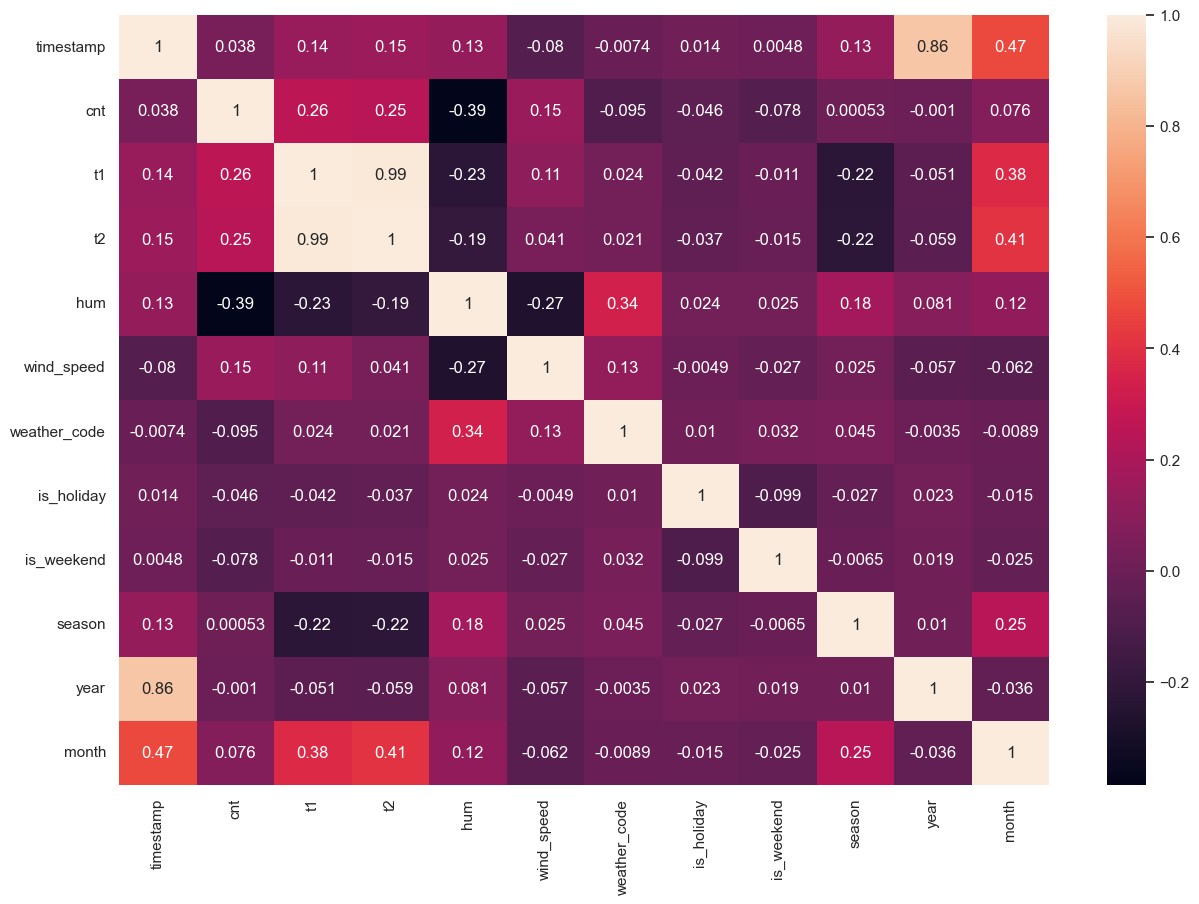

In [74]:
plt.figure(figsize=(15,10))
sns.heatmap(bikes.corr(),annot=True)
plt.show()

- 各因素之间，t1, t2相关度高

# 总结 & 建议

In [ ]:
结合数据分析，就提升订单量给出如下建议：

1. 对于1、2、12月份订单较少情况，可发放行折扣促销（反季促销）券；
2. 对于湿度较低情况，订单需求大，可适当增加单车投放量；
3. 工作日订单多，可在周日增加单车投放量，确保周内需求。